In [1]:
from qite import QITE
from args import demo_args
from helper import state_to_ind, sigma_id, sigma_sx, sigma_sy, sigma_sz
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
hamiltonian = 0.2 * np.kron(sigma_id, sigma_sz) + 0.25 * np.kron(sigma_sx, sigma_sz)
demo_args.num_qubits = 2
demo_args.db = 0.05
demo_args.num_steps = 10
demo_args.shots = 8192
demo_args.delta = 0.1
qite = QITE(demo_args, hamiltonian)
qite.decompose_hamiltonian()

{'03': 0.2, '13': 0.25}

In [3]:
np.linalg.eig(hamiltonian)[0].min()

(-0.44999999999999996+0j)

In [9]:
x = qite.alist[3]
x

[-6.791632812671692e-18,
 0.0017990714021585295,
 -0.0001421590997055844,
 3.7574069467232256e-05,
 -2.2205183617510108e-05,
 0.0016320536386812913,
 0.001633681704335953,
 -1.2603850255143989e-17,
 -0.012244870216690205,
 -0.0014078546979563904,
 0.0015836713652058723,
 -0.01215032397947112,
 -0.0019418582056421373,
 -0.001664583934517578,
 0.00012587602337481497,
 0.0019391371436754104]

In [16]:
(qite.sigma_states == 0) * np.expand_dims(x, 1)

array([[-6.79163281e-18, -6.79163281e-18],
       [ 1.79907140e-03,  0.00000000e+00],
       [-1.42159100e-04, -0.00000000e+00],
       [ 3.75740695e-05,  0.00000000e+00],
       [-0.00000000e+00, -2.22051836e-05],
       [ 0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00],
       [-0.00000000e+00, -0.00000000e+00],
       [-0.00000000e+00, -1.22448702e-02],
       [-0.00000000e+00, -0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00],
       [-0.00000000e+00, -0.00000000e+00],
       [-0.00000000e+00, -1.94185821e-03],
       [-0.00000000e+00, -0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00]])

In [5]:
ground_energy, ground_state = qite.run()

100%|██████████| 10/10 [00:09<00:00,  1.04it/s]


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


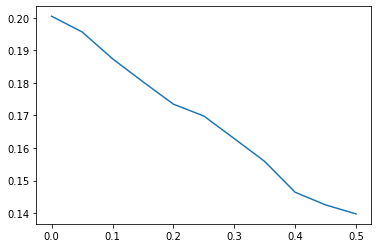

In [6]:
plt.plot(np.arange(demo_args.num_steps+1) * demo_args.db, ground_energy)

In [13]:
np.absolute(np.array(qite.alist) / np.array(alist)).mean(axis=1)

/var/folders/gq/3xlhh9496_j9xpjb7tkbqh280000gn/T/ipykernel_60558/1294317361.py:1: RuntimeWarning: divide by zero encountered in true_divide
  np.absolute(np.array(qite.alist) / np.array(alist)).mean(axis=1)


array([ 5.41898317,  1.04673734,  2.64243916,  0.50691186,  3.61719623,
        4.40915073,  1.38199714,  2.06303717,  8.5238968 ,         inf,
        4.31988157,  0.86909994,  2.13206307,  0.74682228,  8.05054635,
        0.74158299,  0.92286285,  0.90621253,  2.26989881,  1.30044146,
        1.43910461,  9.52691379,  6.22031952, 15.68927249, 24.32455509,
        1.54739883,  1.04712723,  1.07455744,  1.0415588 ,  1.42492269,
        2.77162195,  1.87723141,  3.35933857,  0.28549594,         inf,
        0.60181021,  2.02000755,  0.49033806,  0.81233043,  3.08184237,
               inf,  0.58393858,  0.77658352,         inf,  2.93227414,
       17.59262151,         inf,  4.80611855, 43.60790393,  5.63997105])

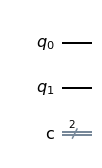

In [9]:
qc = qite.propagate()
qc.draw(output='mpl')

In [10]:
qite.sigma_states

[(0, 0),
 (0, 1),
 (0, 3),
 (1, 0),
 (1, 1),
 (1, 3),
 (2, 2),
 (3, 0),
 (3, 1),
 (3, 3)]